# Module 2: Ensemble Learning and Random Forests

A group of predictors is called an ___ensemble___.  Thus, using multiple predictors (or learners) to make a single decision/prediction is called ___ensemble learning___, and an ensemble learning algorithm is called an ___ensemble method___.

An ensemble of Decision Trees is called a ___random forest___, and despite its simplicity, this is one of the most powerful Machine Learning algorithms available today.

In this module we will discuss random forests and the most popular ensemble methods, including ___bagging___, ___boosting___, and ___stacking___.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ensembles"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Voting Classifiers

Suppose you have trained a few classifiers, each one achieving about 80% accuracy:

<img src="figures/diversePredictors.png " width ="600" />

An easy way to create a single, even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This is called ___hard voting__, and is shown below.

<img src="figures/hardVoting.png " width ="600" />

The main idea of ensemble methods is that many ___weak learners___ (meaning each each predictor does only slightly better than random guessing) can be combined so that the ensemble becomes a ___strong learner___ (achieving high accuracy).  However, those weka learners must be sufficient in number and sufficiently diverse.


In [2]:
heads_proba = 0.51
coin_tosses = (np.random.rand(10000, 10) < heads_proba).astype(np.int32)
cumulative_heads_ratio = np.cumsum(coin_tosses, axis=0) / np.arange(1, 10001).reshape(-1, 1)

Saving figure law_of_large_numbers_plot


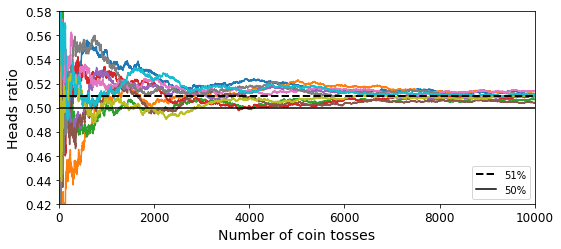

In [3]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
save_fig("law_of_large_numbers_plot")
plt.show()

The following code creates and trains a voting classifier in Scikit-Learn that is composed of three diverse classifiers.  Let's start by getting some data - we will work with the make_moons dataset.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

[[ 8.31039149e-01 -2.58748754e-01]
 [ 1.18506381e+00  9.20387143e-01]
 [ 1.16402213e+00 -4.55525583e-01]
 [-2.36556013e-02  1.08628844e+00]
 [ 4.80502733e-01  1.50942444e+00]
 [ 1.31164912e+00 -5.51176060e-01]
 [ 1.16542367e+00 -1.58629894e-01]
 [ 1.56736404e-01  1.31817168e+00]
 [ 4.53301022e-01  4.96074925e-01]
 [ 1.65139719e+00 -4.59804351e-01]
 [ 1.02664982e+00 -1.56999382e-02]
 [-3.99677570e-01  2.52192940e-01]
 [ 1.85352710e+00 -7.16418704e-01]
 [ 1.17564737e-01  6.24869329e-01]
 [ 1.54123944e+00 -5.11050694e-01]
 [ 1.32833559e+00 -5.40696860e-01]
 [ 1.97170320e+00  2.97790052e-01]
 [ 9.44441260e-01  5.17911799e-01]
 [ 8.30619129e-01 -8.02099114e-01]
 [ 1.89343763e+00 -2.53611270e-01]
 [ 1.88323111e+00  2.22375278e-01]
 [ 2.30801311e+00  4.67930154e-01]
 [-3.89437608e-01  2.39389050e-01]
 [ 1.11201360e+00 -2.15523587e-01]
 [ 3.86380017e-01  4.15946340e-01]
 [ 1.78946151e+00  1.01491329e+00]
 [ 1.53618196e+00  2.21948473e-01]
 [-7.69640886e-01  4.23924672e-01]
 [ 2.32109137e-01  1

In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(solver='lbfgs', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard') 
print(y_train)

[1 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 1 1 0
 1 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0
 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0
 1 0 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 1
 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 0
 1 0 1 1 0 1 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0
 1 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1
 1 0 0 1 0]


In [6]:
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [7]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


If all classifiers are able to estimate class probabilities (that is, they all have a predict_proba() method), then you can tell Scikit-Learn to predict the class with the highest class probability, averaged over all the individual classifiers. This is called ___soft voting___.

In [8]:
log_clf = LogisticRegression(solver="lbfgs", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))])

In [9]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.896
SVC 0.896
VotingClassifier 0.912


# Bagging Ensembles

Another way to get a diverse set of classifiers is to use the same training algorithm for every predictor and train them on different random subsets of the training set. When sampling is performed with replacement, this method is called ___bagging___ (short for ___boot‐strap aggregating___). When sampling is performed without replacement, it is called ___pasting___.

More information about sampling with and without replacement can be found [here](https://www.statisticshowto.com/sampling-with-replacement-without/).

<img src="figures/BaggingPasting.png " width ="600" />

The following code trains an ensemble of 500 Decision Tree classifiers.  Each is trained on 100 training instances randomly sampled from the training set with replacement (therefore, this is an example of bagging, but if you want to use pasting instead, just set bootstrap=False).

In [10]:
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier 

bag_clf = BaggingClassifier(DecisionTreeClassifier(random_state = 42), n_estimators = 500, 
                           max_samples = 100, bootstrap = True, random_state = 42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
y_pred 

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


Let's compare this to the accuracy of a single decision tree:

In [12]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


Let's compare the decision boundaries of the single decision tree and the ensemble of decision trees:

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Saving figure decision_tree_without_and_with_bagging_plot


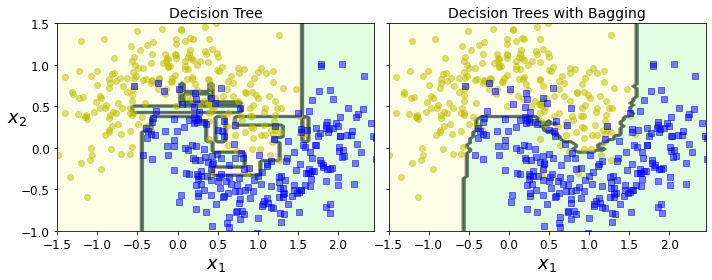

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

## Out-of-Bag Evaluation

In [15]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    bootstrap=True, oob_score=True, random_state=40)
bag_clf.fit(X_train, y_train)
bag_clf.oob_score_

0.8986666666666666

In [16]:
from sklearn.metrics import accuracy_score
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.912

In [17]:
bag_clf.oob_decision_function_

array([[0.32275132, 0.67724868],
       [0.34117647, 0.65882353],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.09497207, 0.90502793],
       [0.31147541, 0.68852459],
       [0.01754386, 0.98245614],
       [0.97109827, 0.02890173],
       [0.97765363, 0.02234637],
       [0.74404762, 0.25595238],
       [0.        , 1.        ],
       [0.7173913 , 0.2826087 ],
       [0.85026738, 0.14973262],
       [0.97222222, 0.02777778],
       [0.0625    , 0.9375    ],
       [0.        , 1.        ],
       [0.97837838, 0.02162162],
       [0.94642857, 0.05357143],
       [1.        , 0.        ],
       [0.01704545, 0.98295455],
       [0.39473684, 0.60526316],
       [0.88700565, 0.11299435],
       [1.        , 0.        ],
       [0.97790055, 0.02209945],
       [0.        , 1.        ],
       [0.99428571, 0.00571429],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.62569832, 0.37430168],
       [0.

## Random Patches and Random Subspaces

Sampling of both the training instances and features is called the ___Random Patches method___.

Keeping all training instances (by setting bootstrap=False and max_samples=1.0) but sampling features (by setting bootstrap_features to True and/or max_features to a value smaller than 1.0) is called the ___Random Subspaces method___.


# Random Forests

A ___random forest___ is an ensemble of decision trees.

The following code trains a Random Forest classifier with 500 trees, each limited to a maximum of 16 nodes.

In [56]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, 
                                 max_leaf_nodes=16, 
                                 random_state=42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

The above `RandomForestClassifier` is roughly equivalent to the following `BaggingClassifier`:

In [19]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)

In [20]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

These to classifiers produce almost identical results:

In [21]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.976

## Extra-Trees

When you are growing a tree in a Random Forest, at each node only a random subset of the features is considered for splitting. It is possible to make trees even more random by also using random thresholds for each feature rather than searching for the best possible thresholds.  This is an ensemble of ___Extremely Randomized Trees___, or ___Extra-Trees___ for short.

## Feature Importance

Random Forests make it easy to measure the relative importance of each feature for predicting a response.  You can access the result using the feature_importances_ variable - note that all importances sum to 1 (i.e. they have been normalized).

Let's take a look at the Iris dataset, and what features are the most important in determining the response:

In [22]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])

rnd_clf.feature_importances_

array([0.11249225, 0.02311929, 0.44103046, 0.423358  ])

Let's zip these importances together with the feature names to get a clearer understanding:

In [23]:
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11249225099876375
sepal width (cm) 0.02311928828251033
petal length (cm) 0.4410304643639577
petal width (cm) 0.4233579963547682


Similarly, we can train a Random Forest classifier on the MNIST dataset and plot each pixel’s importance.  This sort of image represents what is called a ___heat map___.


In [24]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [25]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(random_state=42)

In [26]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

Saving figure mnist_feature_importance_plot


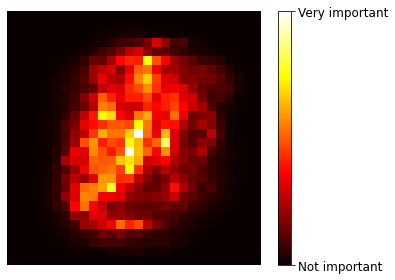

In [27]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

save_fig("mnist_feature_importance_plot")
plt.show()

# Boosting

___Boosting___ refers to any Ensemble method that can combine several weak learners into a strong learner. The general idea of most boosting methods is to train predictors sequentially, each trying to correct its predecessor.

## AdaBoost

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that the predecessor underfit. This results in new predictors focusing more and more on the hard cases. This is the technique used by ___AdaBoost___.

This notion is depicted below:

<img src="figures/AdaBoost.png " width ="600" />

The following figure shows the decision boundary of an AdaBoostClassifier trained on the moons dataset with a DecisionTreeClassifier as the base estimator:

In [28]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm="SAMME.R", learning_rate=0.5, random_state=42)

ada_clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200, random_state=42)

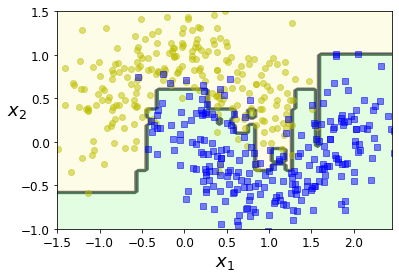

In [29]:
plot_decision_boundary(ada_clf, X, y)

The following figure shows the decision boundaries of five consecutive SVM predictors that are highly regularized and trained on the moons dataset.  This code illustrates a custom implementation that is similar to the AdaBoost algorithm, but not identical.

Saving figure boosting_plot


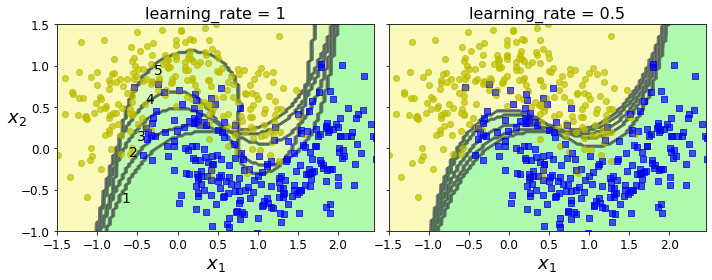

In [30]:
m = len(X_train)

fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
for subplot, learning_rate in ((0, 1), (1, 0.5)):
    sample_weights = np.ones(m)
    plt.sca(axes[subplot])
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, gamma="scale", random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)
    if subplot == 0:
        plt.text(-0.7, -0.65, "1", fontsize=14)
        plt.text(-0.6, -0.10, "2", fontsize=14)
        plt.text(-0.5,  0.10, "3", fontsize=14)
        plt.text(-0.4,  0.55, "4", fontsize=14)
        plt.text(-0.3,  0.90, "5", fontsize=14)
    else:
        plt.ylabel("")

save_fig("boosting_plot")
plt.show()

Let's take a closer look at the AdaBoost algorithm.

- Each instance weight w is initially set to 1/m.
- A first predictor is trained, and its weighted error rate r is computed on the training set

<img src="figures/predictorError.png" width ="150" />

where $\hat{y}_j^{(i)}$ is the $j^{th}$ predictor's prediction for the $i^{th}$ instance

- Next, the predictor’s weight $\alpha_j$ is then computed.

<img src="figures/predictorWeight.png" width ="150" />

where $\eta$ is the learning rate hyperparamter with a default value of 1.

- Next, the AdaBoost algorithm updates the instance weights, using the following equation, which boosts the weights of the misclassified instances.

<img src="figures/weightUpdates.png" width ="300" />

- After the weights are updated, they are all normalized by $\sum_{i=1}^{m} w^{(i)}$.

- Finally, a new predictor is trained using the updated weights, and the whole process is repeated.

- To make predictions, AdaBoost simply computes the predictions of all the predictors and weighs them using the predictor weights $\alpha_j$. 

<img src="figures/AdaBoostPrediction.png" width ="300" />

# Gradient Boosting

___Gradient Boosting___ works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the ___residual errors___ made by the previous predictor.

<img src="figures/residualErrors.png" width ="400" />

Let’s go through a simple regression example using Decision Trees as the base predictors. This is called ___Gradient Tree Boosting___, or ___Gradient Boosted Regression Trees (GBRT)___.

In [51]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)
print(y)

[ 5.15728987e-02  5.94479790e-01  1.66051606e-01 -7.01779562e-02
  3.43985933e-01  3.72874939e-01  6.59764984e-01  3.76341398e-01
 -9.75194335e-03  1.04794741e-01  7.35287787e-01  6.78883363e-01
  3.05066318e-01  2.73909733e-01  3.08559932e-01  3.49130363e-01
  7.98606436e-02 -1.45444646e-02 -5.71096619e-03  5.75800683e-02
  5.23392240e-02  4.02946793e-01  1.29867214e-01  4.18481141e-02
 -6.49789982e-02  2.22943721e-01  2.53451786e-01 -3.95060058e-02
  1.75570720e-02  6.37324227e-01  1.29006981e-01  3.34391950e-01
  5.80417870e-01  6.00772381e-01  5.54501010e-01  2.84001079e-01
  1.17538848e-01  6.08765289e-01  9.22073759e-02  2.58225391e-02
  4.26829699e-01 -5.83641153e-02  7.07523289e-01  5.40226226e-01
  2.14112889e-01  3.37711060e-02  1.76497872e-01 -6.88843767e-02
  3.58884053e-02  4.07472924e-01  6.12002352e-01  1.98779325e-01
  5.84460527e-01  4.42492127e-01 -4.87799540e-02  5.37361759e-01
  4.54900077e-01  3.00958881e-01  5.74483445e-01  1.69025200e-01
 -1.98442712e-03  1.40740

First, let’s fit a DecisionTreeRegressor to the training set:

In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Next, we’ll train a second DecisionTreeRegressor on the residual errors made by the first predictor:

In [33]:
y2 = y- tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

Then we train a third regressor on the residual errors made by the second predictor:

In [34]:
y3 = y2-tree_reg1.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

Now we have an ensemble containing three trees. It can make predictions on a new instance simply by adding up the predictions of all the trees:

In [35]:
X_new = np.array([[0.8]])

In [36]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

The following figure represents the predictions of these three trees in the left column, and the ensemble’s predictions in the right column.

In [37]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

Saving figure gradient_boosting_plot


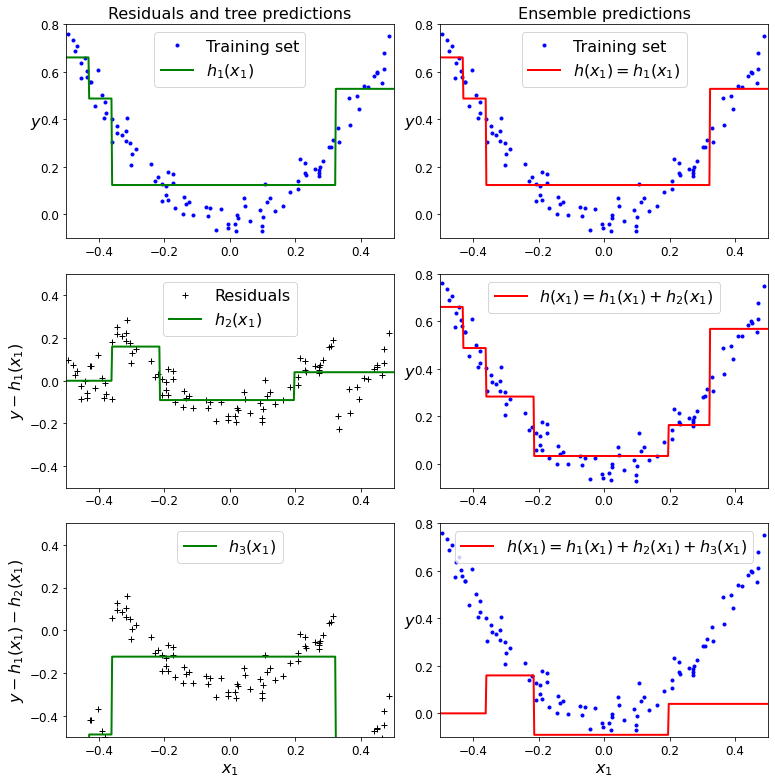

In [38]:
plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

save_fig("gradient_boosting_plot")
plt.show()

A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRegressor class.  

The following code and figure shows two GBRT ensembles trained with a low learning rate: the first model does not have enough trees to fit the training set, while the second one has too many trees and overfits the training set.


In [39]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)

In [48]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=20, learning_rate = 0.1, random_state=42)
gbrt_slow.fit(X,y)

GradientBoostingRegressor(max_depth=2, n_estimators=20, random_state=42)

Saving figure gbrt_learning_rate_plot


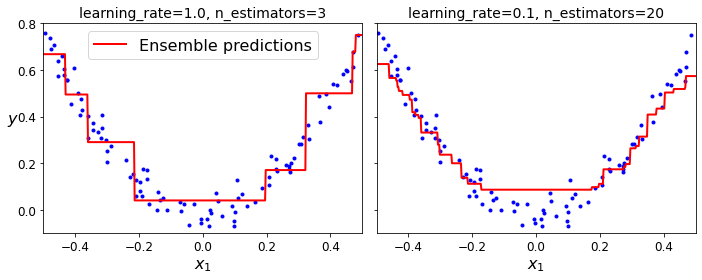

In [43]:
fix, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.xlabel("$x_1$", fontsize=16)

save_fig("gbrt_learning_rate_plot")
plt.show()

## Gradient Boosting with Early Stopping

In order to find the optimal number of trees, you can use early stopping. A simple way to implement this is to use the staged_predict() method: it returns an iterator over the predictions made by the ensemble at each stage of training (with one tree, two trees, etc.). The following code trains a GBRT ensemble with 120 trees, then measures the validation error at each stage of training to find the optimal number of trees, and finally trains another GBRT ensemble using the optimal number of trees:

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators=np.argmin(errors)+1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=2, n_estimators=56, random_state=42)

In [45]:
min_error = np.min(errors)
min_error 

0.002712853325235463

The validation errors are represented on the left of the following figure, and the best model’s predictions are represented on the right.

Saving figure early_stopping_gbrt_plot


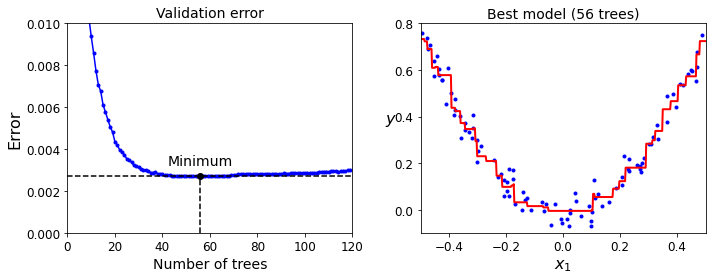

In [46]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

save_fig("early_stopping_gbrt_plot")
plt.show()

The following code stops training when the validation error does not improve for five iterations in a row:

In [47]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [48]:
print(gbrt.n_estimators)

61


In [49]:
print("Minimum validation MSE:", min_val_error)

Minimum validation MSE: 0.002712853325235463


## Using XGBoost

There is an optimized implementation of Gradient Boosting available in the popular Python library ___XGBoost___, which stands for ___Extreme Gradient Boosting___.

It is not required to download the XGBoost library for this class, however.

In [ ]:
try:
    import xgboost
except ImportError as ex:
    print("Error: the xgboost library is not installed.")
    xgboost = None

In [ ]:
if xgboost is not None:  # not shown in the book
    xgb_reg = xgboost.XGBRegressor(random_state=42)
    xgb_reg.fit(X_train, y_train)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred) # Not shown
    print("Validation MSE:", val_error)           # Not shown

In [ ]:
if xgboost is not None:  # not shown in the book
    xgb_reg.fit(X_train, y_train,
                eval_set=[(X_val, y_val)], early_stopping_rounds=2)
    y_pred = xgb_reg.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)  # Not shown
    print("Validation MSE:", val_error)            # Not shown

In [ ]:
%timeit xgboost.XGBRegressor().fit(X_train, y_train) if xgboost is not None else None

In [ ]:
%timeit GradientBoostingRegressor().fit(X_train, y_train)

# Stacking

The last ensemble method we will discuss in this chapter is called ___stacking___. It is based on a simple idea: instead of using trivial functions (such as hard voting) to aggregate the predictions of all predictors in an ensemble, why don’t we train a model to perform this aggregation?

The final predictor in the stacking method is called a ___blender___ or a ___meta learner___, which takes predictions from lower-level models as input and makes a final prediction.

<img src="figures/stacking1.png" width ="700" />

To train the blender, a common approach is to use a hold-out set.  First, the training set is split into two subsets. The first subset is used to train the predictors in the first layer.

<img src="figures/stacking2.png" width ="700" />

Next, the first layer’s predictors are used to make predictions on the second (held-out) set. We can create a new training set using these predicted values as input features, and keeping the target values. The blender is trained on this new training set, so it learns to predict the target value, given the first layer’s predictions.

<img src="figures/stacking3.png" width ="700" />

You can train several different blenders this way. The trick is to split the training set into three subsets: the first one is used to train the first layer, the second one is used to create the training set used to train the second layer (using predictions made by the predictors of the first layer), and the third one is used to create the training set to train the third layer (using predictions made by the predictors of the second layer). Once this is done, you can make a prediction for a new instance by going through each layer sequentially.

<img src="figures/stacking4.png" width ="700" />
